<a href="https://colab.research.google.com/github/swistak7171/175IC-machine-learning/blob/master/zad.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zadanie 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


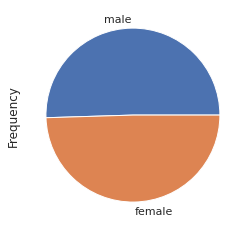

In [74]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import sys

print('Zadanie 1')
np.random.seed(50)
raw_data_frame = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
raw_data_frame.head()

data_frame = raw_data_frame.copy()
data_frame.info()

data_frame[data_frame.duplicated()]
data_frame.drop_duplicates(inplace=True)
data_frame.dropna(inplace=True)

columns = ['smoker', 'sex', 'region']
for column in columns:
    data_frame[column] = data_frame[column].astype('category')

data_frame['sex'].value_counts()
data_frame['sex'].value_counts().plot(kind='pie')
data_frame['smoker'].value_counts()
data_frame['charges'].plot(kind='hist', bins=30)
px.histogram(data_frame, x='charges', width=700, height=400, nbins=50, facet_col='smoker', facet_row='sex')

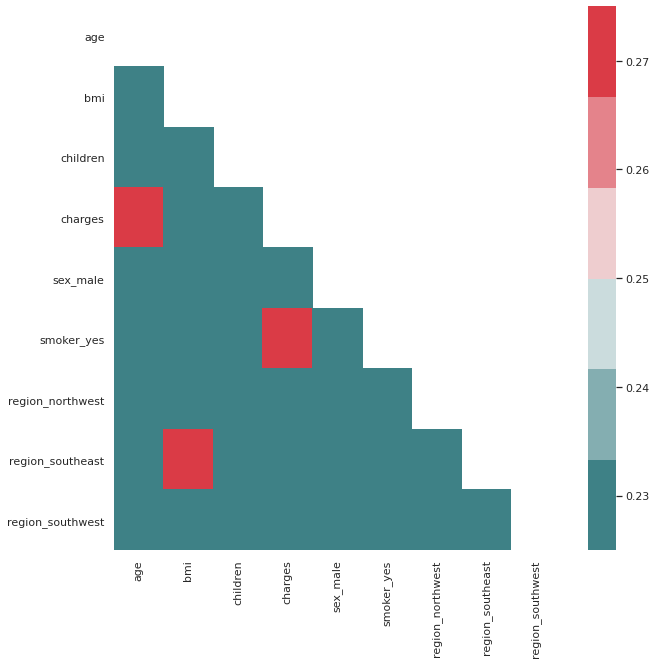

In [77]:
dummies_data_frame = pd.get_dummies(data_frame, drop_first=True)
dummies_data_frame

correlation = dummies_data_frame.corr()
correlation

sns.set(style='white')
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = 1
plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200, 10)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=0.25, vmin=0.25)

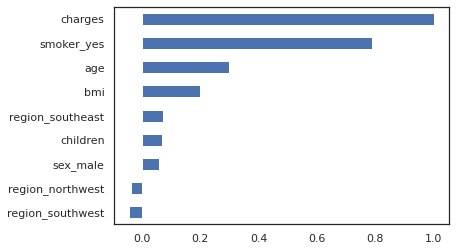

In [80]:
dummies_data_frame.corr()['charges'].sort_values(ascending=False)
dummies_data_frame.corr()['charges'].sort_values().plot(kind='barh')

R2 score: 0.7169
Mean Absolute Error = 4274.83
Zadanie 2
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     392.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.35e-301
Time:                        14:30:01   Log-Likelihood:                -10143.
No. Observations:                1002   AIC:                         2.030e+04
Df Residuals:                     993   BIC:                         2.035e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

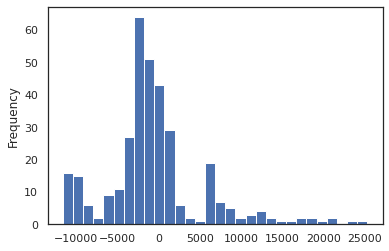

In [81]:
charges_column = dummies_data_frame['charges']
data_frame_without_charges = dummies_data_frame.drop(columns='charges')
x_train, x_test, y_train, y_test = train_test_split(data_frame_without_charges, charges_column)

regressor = LinearRegression()
regressor.fit(x_train, y_train)
first_r2 = regressor.score(x_test, y_test)
print(f"R2 score: {regressor.score(x_test, y_test):.4f}")

y_pred = regressor.predict(x_test)
y_pred[:10]

y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()
predictions['error'].plot(kind='hist', bins=30)

mae_value = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error = {mae_value:.2f}")

In [ ]:
print('Zadanie 2')
x_train_ols = sm.add_constant(x_train.values)
ols = sm.OLS(endog=y_train, exog=x_train_ols).fit()
predictors = ['const'] + list(x_train.columns)
summary = ols.summary(xname=predictors)
print(summary)

summary_html = summary.tables[1].as_html()
summary_data_frame = pd.read_html(summary_html, header=0, index_col=0)[0]
redundant_columns = summary_data_frame[summary_data_frame['P>|t|'] > 0.05].index.tolist()
result_data_frame = dummies_data_frame.drop(columns = redundant_columns)
result_data_frame

charges_column = result_data_frame['charges']
data_frame_without_charges = result_data_frame.drop(columns='charges')
x_train, x_test, y_train, y_test = train_test_split(data_frame_without_charges, charges_column)

regressor.fit(x_train, y_train)
second_r2 = regressor.score(x_test, y_test)
y_pred = regressor.predict(x_test)
y_true = y_test.copy()
mae_value2 = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error 2 = {mae_value2:.2f}")

def calculate_difference_percent(lower, higher) -> float:
  return 100 - ((lower/higher) * 100)

print(f"First R2: {first_r2}")
print(f"Second R2: {second_r2}")
lower = 0
higher = 0
if first_r2 > second_r2: 
  lower = second_r2
  higher = first_r2 
else: 
  lower = first_r2
  higher = second_r2
print(f"R2 difference: {calculate_difference_percent(lower, higher):.4f}%")

print(f"First MAE: {mae_value}")
print(f"Second MAE: {mae_value2}")
if mae_value > mae_value2: 
  lower = mae_value2
  higher = mae_value 
else: 
  lower = mae_value
  higher = mae_value2
print(f"MAE difference: {calculate_difference_percent(lower, higher):.4f}%")

dummies_size = sys.getsizeof(dummies_data_frame)
result_size = sys.getsizeof(result_data_frame)
print(f"First size: {dummies_size}")
print(f"Second size: {result_size}")
if dummies_size > result_size: 
  lower = result_size
  higher = dummies_size 
else: 
  lower = result_size
  higher = dummies_size
print(f"Size difference: {calculate_difference_percent(lower, higher):.4f}%")